In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pwd

'/home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project'

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

## Model 1 - Christian

In [3]:
cd /home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project/aerialDetection/

/home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project/aerialDetection


In [4]:
from inference import unet_inference
from PIL import Image
import torchvision.transforms as transforms
import torch
import os

In [16]:
demo_im = Image.open('./demo.PNG')
demo_im_out = './demo_out.png'
to_tensor = transforms.ToTensor()
to_image = transforms.ToPILImage()

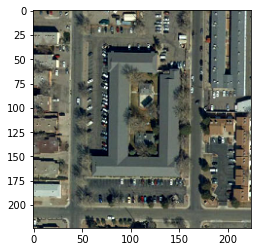

In [17]:
plt.imshow(demo_im)

In [18]:
demo_im = to_tensor(demo_im)
demo_im = demo_im[0:3, :, :] ##strip transparency layer

In [20]:
state_dict_path = './model_state/project.pth'
inference = unet_inference(state_dict_path)

In [21]:
out = inference.run_inference(demo_im)

In [24]:
out[0,:,:]

tensor([[0.9437, 0.9631, 0.9731,  ..., 0.6375, 0.7485, 0.7675],
        [0.9625, 0.9696, 0.9810,  ..., 0.6733, 0.7656, 0.8070],
        [0.9756, 0.9806, 0.9891,  ..., 0.6434, 0.6607, 0.7344],
        ...,
        [0.8820, 0.9240, 0.9411,  ..., 1.0000, 0.9997, 0.9996],
        [0.8960, 0.9261, 0.9337,  ..., 0.9999, 0.9996, 0.9987],
        [0.8684, 0.8732, 0.8590,  ..., 0.9999, 0.9994, 0.9962]])

In [25]:
out[1,:,:]

tensor([[5.6268e-02, 3.6874e-02, 2.6917e-02,  ..., 3.6245e-01, 2.5151e-01,
         2.3245e-01],
        [3.7457e-02, 3.0353e-02, 1.9020e-02,  ..., 3.2673e-01, 2.3439e-01,
         1.9303e-01],
        [2.4391e-02, 1.9393e-02, 1.0872e-02,  ..., 3.5663e-01, 3.3933e-01,
         2.6556e-01],
        ...,
        [1.1803e-01, 7.6020e-02, 5.8868e-02,  ..., 4.9354e-05, 3.4429e-04,
         4.3388e-04],
        [1.0400e-01, 7.3853e-02, 6.6290e-02,  ..., 6.5464e-05, 4.1934e-04,
         1.2772e-03],
        [1.3164e-01, 1.2675e-01, 1.4101e-01,  ..., 6.4333e-05, 6.4692e-04,
         3.8376e-03]])

In [28]:
ot = (torch.lt(out[0, :, :],out[1, :, :])).float()
ot

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [33]:
oi = to_image(ot)

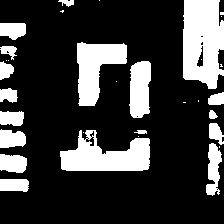

In [40]:
oi

## Model 2 - Ahmed

In [3]:
cd /home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project/DL_FinalProject_Draft/

/home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project/DL_FinalProject_Draft


In [5]:
import matplotlib.pyplot as plt
from inference import unet_inference
from PIL import Image
import torchvision.transforms as transforms
import torch

In [6]:
demo_im = Image.open('./demo.png')
demo_im_out = './demo_out1.png'
to_tensor = transforms.ToTensor()
to_image = transforms.ToPILImage()

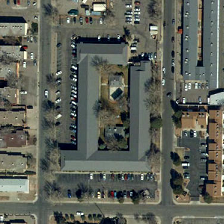

In [7]:
demo_im

In [8]:
demo_im = to_tensor(demo_im)
demo_im = demo_im[0:3, :, :] #strip transparency layer

In [9]:
inference = unet_inference()
out = inference.run_inference(demo_im)

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
out.shape

torch.Size([224, 224])

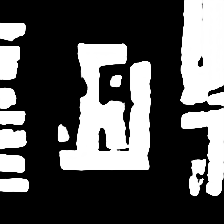

In [11]:
out = to_image(out)
out

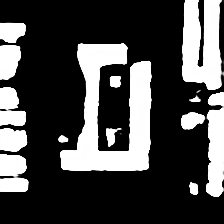

In [11]:
out = to_image(out)
out

## Model 3 - Sandeep

In [2]:
import fastai
from fastai.vision.all import *
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [3]:
codes = np.array(['background','building'])

In [4]:
path = Path('/home/sandeep/Desktop/CS7643_DeepLearning/Project/building_footprints_cs7643/imgs/')

In [5]:
fnames = get_image_files(path/'images-512')

In [6]:
def label_func(fn):
    ''' returns the path object for label file for passed image file path object '''
    return path/"masks-512-coded"/f"{fn.stem}{fn.suffix}"

In [7]:
aug_tfms = aug_transforms( do_flip=True, flip_vert=True, max_zoom=2,max_lighting=0.3,max_warp=0.1)

In [8]:
dls = SegmentationDataLoaders.from_label_func(
       path, bs=1, fnames = fnames, 
       label_func = label_func, codes = codes, 
       item_tfms=[Resize(224)], batch_tfms=aug_tfms
    )

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can

In [10]:
# from fastai.vision.all import *

# __all__ = ['DiceLoss', 'CombinedLoss']

# def _one_hot(x, classes, axis=1):
#     "Target mask to one hot"
#     return torch.stack([torch.where(x==c, 1,0) for c in range(classes)], axis=axis)

# class DiceLoss:
#     "Dice coefficient metric for binary target in segmentation"
#     def __init__(self, axis=1, smooth=1): 
#         store_attr()
#     def __call__(self, pred, targ):
#         targ = _one_hot(targ, pred.shape[1])
#         pred, targ = flatten_check(self.activation(pred), targ)
#         inter = (pred*targ).sum()
#         union = (pred+targ).sum()
#         return 1 - (2. * inter + self.smooth)/(union + self.smooth)
    
#     def activation(self, x): return F.softmax(x, dim=self.axis)
#     def decodes(self, x):    return x.argmax(dim=self.axis)
    

# class CombinedLoss:
#     "Dice and Focal combined"
#     def __init__(self, axis=1, smooth=1, alpha=1):
#         store_attr()
#         self.focal_loss = FocalLossFlat(axis=axis)
#         self.dice_loss =  DiceLoss(axis, smooth)
        
#     def __call__(self, pred, targ):
#         return self.focal_loss(pred, targ) + self.alpha * self.dice_loss(pred, targ)
    
#     def decodes(self, x):    return x.argmax(dim=self.axis)
#     def activation(self, x): return F.softmax(x, dim=self.axis)


In [11]:
learn = unet_learner(dls, resnet34, normalize=True, loss_func=CombinedLoss(), metrics=DiceMulti())

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [14]:
learn.load('/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/image_data/data_building_footprint/training_512x512/models/model_fastai_focal_dice_segmentation_1')

In [31]:
img = cv2.imread('/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/images_home/tiles_xy_1/tile_sat_z20_84526_203498.png')
# plt.imshow(img)

In [42]:
img = cv2.imread('/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/images_home/tiles_xy_1/tile_sat_z20_84526_203498.png')
img.dtype

dtype('uint8')

In [46]:
img =np.asarray(Image.open('/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/images_home/tiles_xy_1/tile_sat_z20_84526_203498.png'))
img.dtype


dtype('uint8')

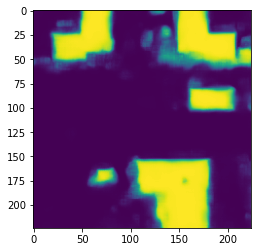

In [50]:
res = learn.predict(img)
plt.imshow(res[2][1])

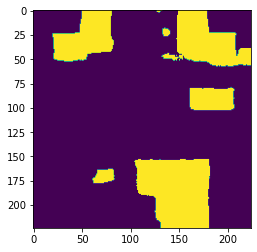

In [38]:
res = learn.predict('/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/images_home/tiles_xy_1/tile_sat_z20_84526_203498.png')
plt.imshow(res[0])

## Collective Inference

In [1]:
pwd

'/home/sandeep/GoogleDrive/GTech/CS7643_DeepLearning/Project'

In [4]:
#Setup commons library

# sys.path.append('./DL_FinalProject_Draft/')
# sys.path.append('./aerialDetection/')

import matplotlib.pyplot as plt
from DL_FinalProject_Draft.inference import preTrainedResUnet_inference
from PIL import Image
import torchvision.transforms as transforms
import torch
from aerialDetection.inference import unet_inference
import os
import sys
import fastai
from fastai.vision.all import *
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from building_footprints_cs7643.losses.combined_loss import *
from building_footprints_cs7643.inference.inference import *

In [5]:
to_tensor = transforms.ToTensor()
to_image = transforms.ToPILImage()

img_PIL = Image.open('./demo.png')
img_tensor = to_tensor(img_PIL)[0:3, :, :]

In [11]:
np.asarray(img_PIL)

array([[[144, 133, 111, 255],
        [132, 120,  98, 255],
        [124, 113,  91, 255],
        ...,
        [103, 103,  95, 255],
        [ 97,  98,  91, 255],
        [ 97,  99,  95, 255]],

       [[132, 120, 100, 255],
        [132, 120, 100, 255],
        [127, 115,  96, 255],
        ...,
        [103, 103,  95, 255],
        [ 93,  94,  87, 255],
        [ 95,  97,  92, 255]],

       [[123, 116,  96, 255],
        [130, 123, 103, 255],
        [125, 118,  98, 255],
        ...,
        [100, 100,  92, 255],
        [ 95,  96,  89, 255],
        [ 98, 100,  95, 255]],

       ...,

       [[ 23,  33,  50, 255],
        [ 42,  58,  69, 255],
        [ 43,  64,  73, 255],
        ...,
        [ 95,  98,  85, 255],
        [ 98, 102,  89, 255],
        [107, 111,  98, 255]],

       [[ 44,  52,  55, 255],
        [ 62,  72,  72, 255],
        [ 46,  58,  58, 255],
        ...,
        [ 87,  90,  79, 255],
        [ 94,  97,  86, 255],
        [100, 102,  92, 255]],

       [[136

In [4]:
#Ahmed's model
inference = preTrainedResUnet_inference(output_channels=2)
out = inference.run_inference(img_tensor) ##
building_pixels = torch.ones(out[0].shape)
if inference.output_channels == 2:
    building_pixels = (torch.lt(out[0, :, :],out[1, :, :])).float()
preds_model1 = building_pixels*out[1, :, :]

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
torch.min(preds_model1),torch.max(preds_model1),len(torch.unique(preds_model1))

(tensor(0.), tensor(1.), 1603)

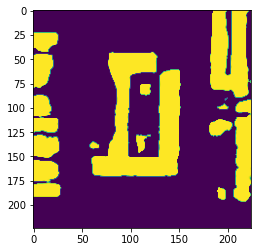

In [6]:
plt.imshow(preds_model1)

In [7]:
#Christian's Model

In [8]:
state_dict_path = './aerialDetection/model_state/project.pth'

In [9]:
inference = unet_inference(state_dict_path)

In [10]:
out = inference.run_inference(img_tensor)
building_pixels = torch.ones(out[0].shape)
if out.shape[0] == 2:
    building_pixels = (torch.lt(out[0, :, :],out[1, :, :])).float()
preds_model2 = building_pixels*out[1, :, :]

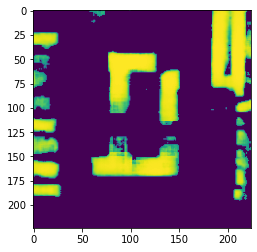

In [11]:
plt.imshow(preds_model2)

In [12]:
#Sandeep's Model

In [13]:
out=run_inference3(img_PIL)

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/fastai/metrics.py:366: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


In [24]:
# out = inference.run_inference(img_PIL)
building_pixels = torch.ones(out[0].shape)
if out[2].shape[0] == 2:
    building_pixels = np.uint8(out[2][0]<out[2][1])
preds_model3 = torch.tensor(building_pixels*out[2][1].numpy())

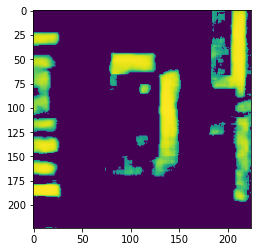

In [25]:
plt.imshow(preds_model3)

In [ ]:
#Merge all 3 masks

In [69]:
pred_merged = torch.stack([preds_model1,preds_model2,preds_model3],dim=0)
most_confident_pixels = pred_merged.max(dim=0)
merged_mask = np.uint8(most_confident_pixels[0]>0.2)

torch.Size([3, 224, 224])

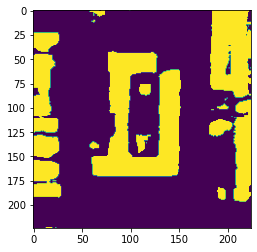

In [77]:
plt.imshow(merged_mask)

In [80]:
plt.imsave('merged_mask.png',merged_mask)

In [81]:
type(merged_mask)

numpy.ndarray

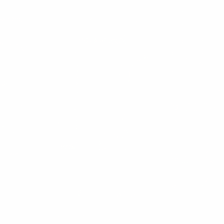

In [89]:
Image.fromarray(np.uint8(np.array(img_PIL)*255))

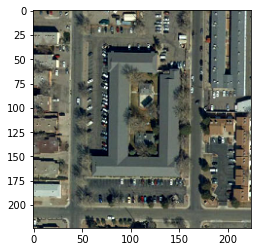

In [87]:
plt.imshow(np.array(img_PIL))

In [90]:
img_np = plt.imread('/home/sandeep/Desktop/tile_sat_z20_84365_203393.png')

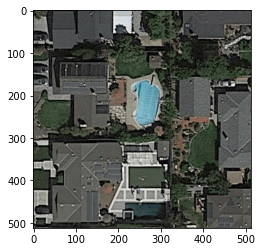

In [94]:
plt.imshow(img_np)

In [95]:
img_np = img_np[:,:,:3]
if not img_np.dtype == np.uint8:
    img_PIL = Image.fromarray(np.uint8(img_np*255))
else:
    img_PIL = Image.fromarray(img_np)
    

## Test mask_inference.py

In [1]:
from mask_detecton import * 

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be unders

In [2]:
img_np = plt.imread('/home/sandeep/Desktop/CS7643_DeepLearning/Project/building_footprints_cs7643/demo.png')

In [3]:
mask = mask_inference(img_np)

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytor

/home/sandeep/GoogleDrive/beans-home/mount_shared_partition/conda_envs/solaris/lib/python3.7/site-packages/fastai/metrics.py:366: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


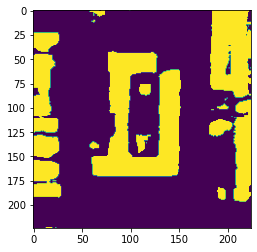

In [4]:
plt.imshow(mask)